## Zomato Data Analysis Project 

## Step-1 importing libraries

pandas is used for data manipulation and analysis
numpy is used for numerical operations
matplolib.pyplot and seaborn are used for data visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install matplotlib --upgrade
!pip install seaborn --upgrade

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 381.6 kB/s eta 0:00:20
   -- ------------------------------------- 0.5/7.8 MB 381.6 kB/s eta 0:00:20
   ---- ----------------------------------- 0.8/7.8 MB 441.7 kB/s eta 0:00:16
   ---- ----------------------------------- 0.8/7.8 MB 441.7 kB/s eta 0:00:16
   ---- ----------------------------------- 0.8/7.8 MB 441.7 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/7.8 MB 445.3 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/7

  You can safely remove it manually.
  You can safely remove it manually.


### Step-2 Create the data frame

In [3]:
dataframe = pd.read_csv("Zomato data.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Convert the data type column - rate

In [5]:
def handleRate (value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe["rate"]=dataframe["rate"].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Restaurant

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

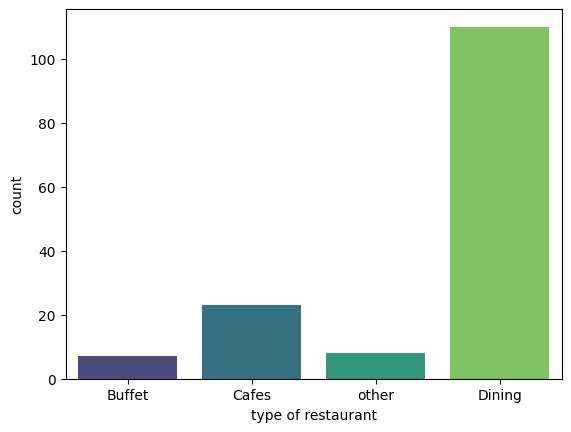

In [26]:
sns.countplot(x="listed_in(type)", hue="listed_in(type)", palette="viridis", data= dataframe)
plt.xlabel("type of restaurant")

## conlclusion- majority of the restaurant falls in dinning category

Text(0, 0.5, 'votes')

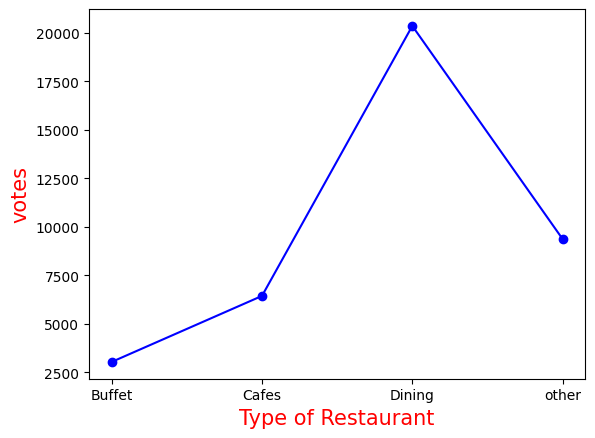

In [9]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of Restaurant", c="red", size=15)
plt.ylabel("votes", c="red", size=15)                                

## Conclusion- dinning restaurants have received maximum votes

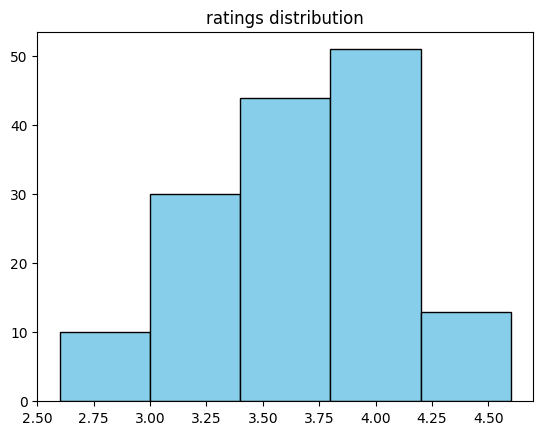

In [27]:
plt.hist(dataframe["rate"], bins=5, color="skyblue", edgecolor="black")
plt.title("ratings distribution")
plt.show()

## Conclusion- the majority of the restaurants received ratings from 3.5 to 4

## Average order spending by couple

In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

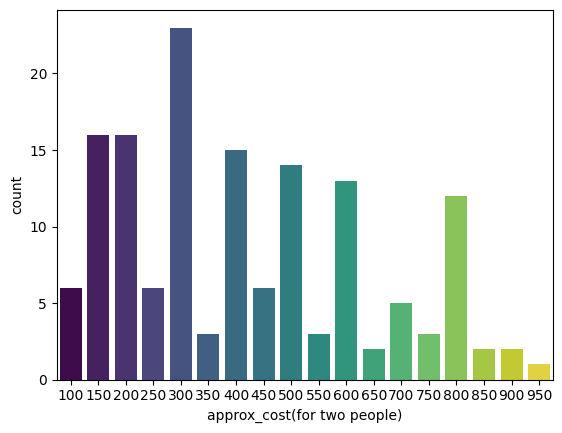

In [25]:
couple_data= dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data, hue=couple_data, palette="viridis", legend= False)

## Conclusion- the majority of the couples prefer restaurants with approximately cost of 300 rupess

## which mode receives maximum rating

In [13]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

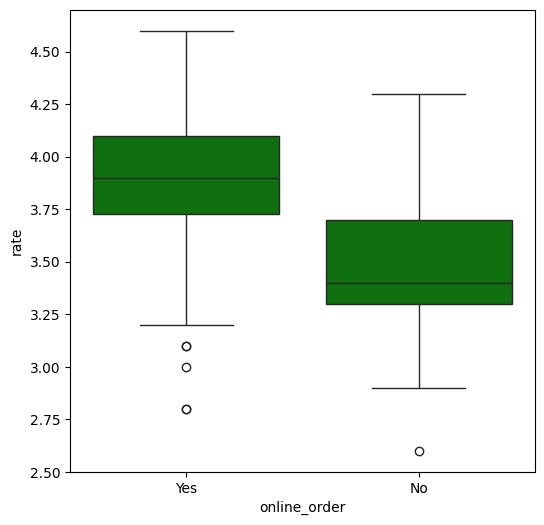

In [31]:
plt.figure(figsize= (6,6))
sns.boxplot(x="online_order", y="rate",color="green", data= dataframe)

## offline order received lower rating in comparison to online order in comparison to online order

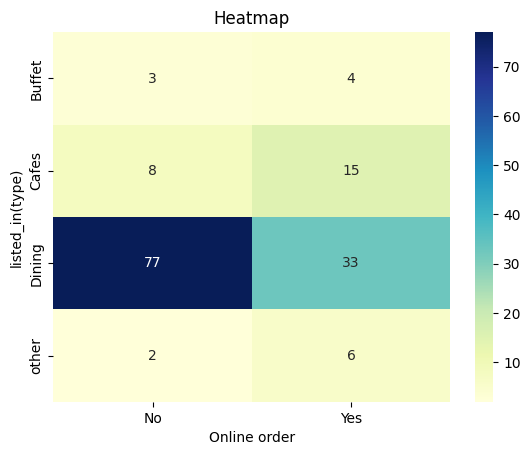

In [15]:
pivot_table= dataframe.pivot_table(index= "listed_in(type)", columns= "online_order", aggfunc= "size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("listed_in(type)")
plt.show()          

## Dinning restaurants primarly accept offline order, whereas cafes primarly receive orders This suggests that client preferorders in person at restaurants but prefer online ordering at cafes.